**Import Libraries** \\
This cell imports all required libraries for data manipulation, visualization, machine learning modeling, and evaluation. It also sets up Matplotlib to show plots inline within the
Notebook.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import LabelEncoder

%matplotlib inline


**Load and Inspect Data** \\
This cell loads the dataset from a specified path and prints the first few entries, basic dataset info, and statistical summary to get an initial understanding of the structure and statistics of the data.

In [2]:
salary = pd.read_csv("Salary Data.csv")

print(salary.head())
print(salary.info())
print(salary.describe())


    Age  Gender Education Level          Job Title  Years of Experience  \
0  32.0    Male      Bachelor's  Software Engineer                  5.0   
1  28.0  Female        Master's       Data Analyst                  3.0   
2  45.0    Male             PhD     Senior Manager                 15.0   
3  36.0  Female      Bachelor's    Sales Associate                  7.0   
4  52.0    Male        Master's           Director                 20.0   

     Salary  
0   90000.0  
1   65000.0  
2  150000.0  
3   60000.0  
4  200000.0  
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 375 entries, 0 to 374
Data columns (total 6 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Age                  373 non-null    float64
 1   Gender               373 non-null    object 
 2   Education Level      373 non-null    object 
 3   Job Title            373 non-null    object 
 4   Years of Experience  373 non-null    float64
 5   Salary

**Data Cleaning** \\
This cell cleans the data by removing duplicates and handling missing values by dropping rows with any missing data, ensuring the data is clean for analysis. It also prints the new shape of the dataset post-cleaning.

In [3]:
salary.drop_duplicates(inplace=True)
salary.dropna(inplace=True)
print(f"Data shape after cleaning: {salary.shape}")

Data shape after cleaning: (324, 6)


**Encode Categorical Variables** \\
Categorical variables are encoded to numerical values using LabelEncoder, which is essential for fitting a machine learning model. The output shows the DataFrame with transformed categorical columns.

In [4]:
label_encoders = {}
for column in ['Gender', 'Education Level', 'Job Title']:
    le = LabelEncoder()
    salary[column] = le.fit_transform(salary[column])
    label_encoders[column] = le

print(salary.head())


    Age  Gender  Education Level  Job Title  Years of Experience    Salary
0  32.0       1                0        159                  5.0   90000.0
1  28.0       0                1         17                  3.0   65000.0
2  45.0       1                2        130                 15.0  150000.0
3  36.0       0                0        101                  7.0   60000.0
4  52.0       1                1         22                 20.0  200000.0


**Correlation Analysis** \\
This cell calculates the correlation matrix of the dataset and prints it, followed by a heatmap visualization. This helps identify how features are related to each other, particularly how they relate to the target variable 'Salary'.

                          Age    Gender  Education Level  Job Title  \
Age                  1.000000 -0.025034         0.540383   0.118619   
Gender              -0.025034  1.000000        -0.024470   0.039072   
Education Level      0.540383 -0.024470         1.000000   0.113519   
Job Title            0.118619  0.039072         0.113519   1.000000   
Years of Experience  0.979192 -0.001367         0.573912   0.105513   
Salary               0.916543  0.075420         0.661900   0.135939   

                     Years of Experience    Salary  
Age                             0.979192  0.916543  
Gender                         -0.001367  0.075420  
Education Level                 0.573912  0.661900  
Job Title                       0.105513  0.135939  
Years of Experience             1.000000  0.924455  
Salary                          0.924455  1.000000  


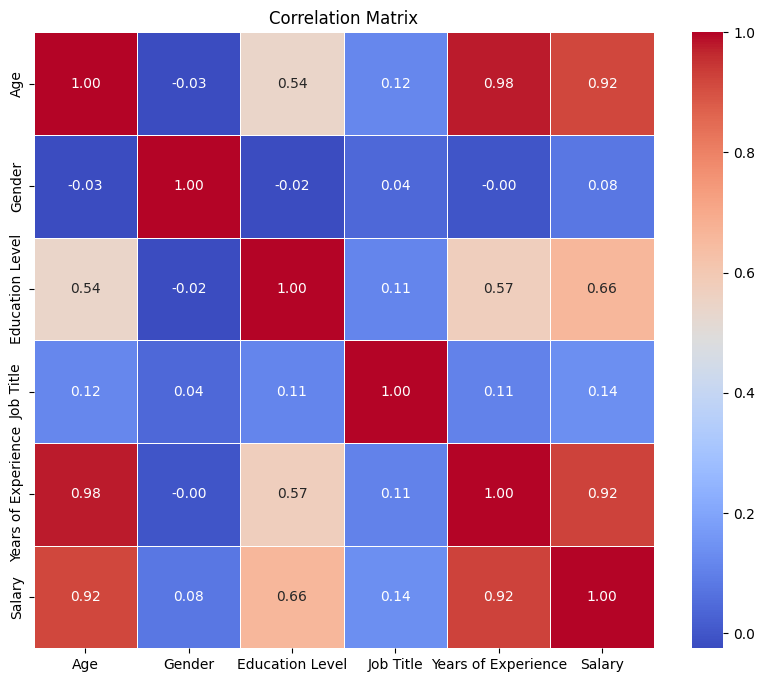

In [5]:
corr_matrix = salary.corr()
print(corr_matrix)

plt.figure(figsize=(10, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Matrix')
plt.show()


**Exploratory Data Analysis with Pairplot** \\
This cell uses Seaborn's pairplot to visualize pairwise relationships and distributions of the dataset across all features, giving insights into correlations and potential linear relationships.

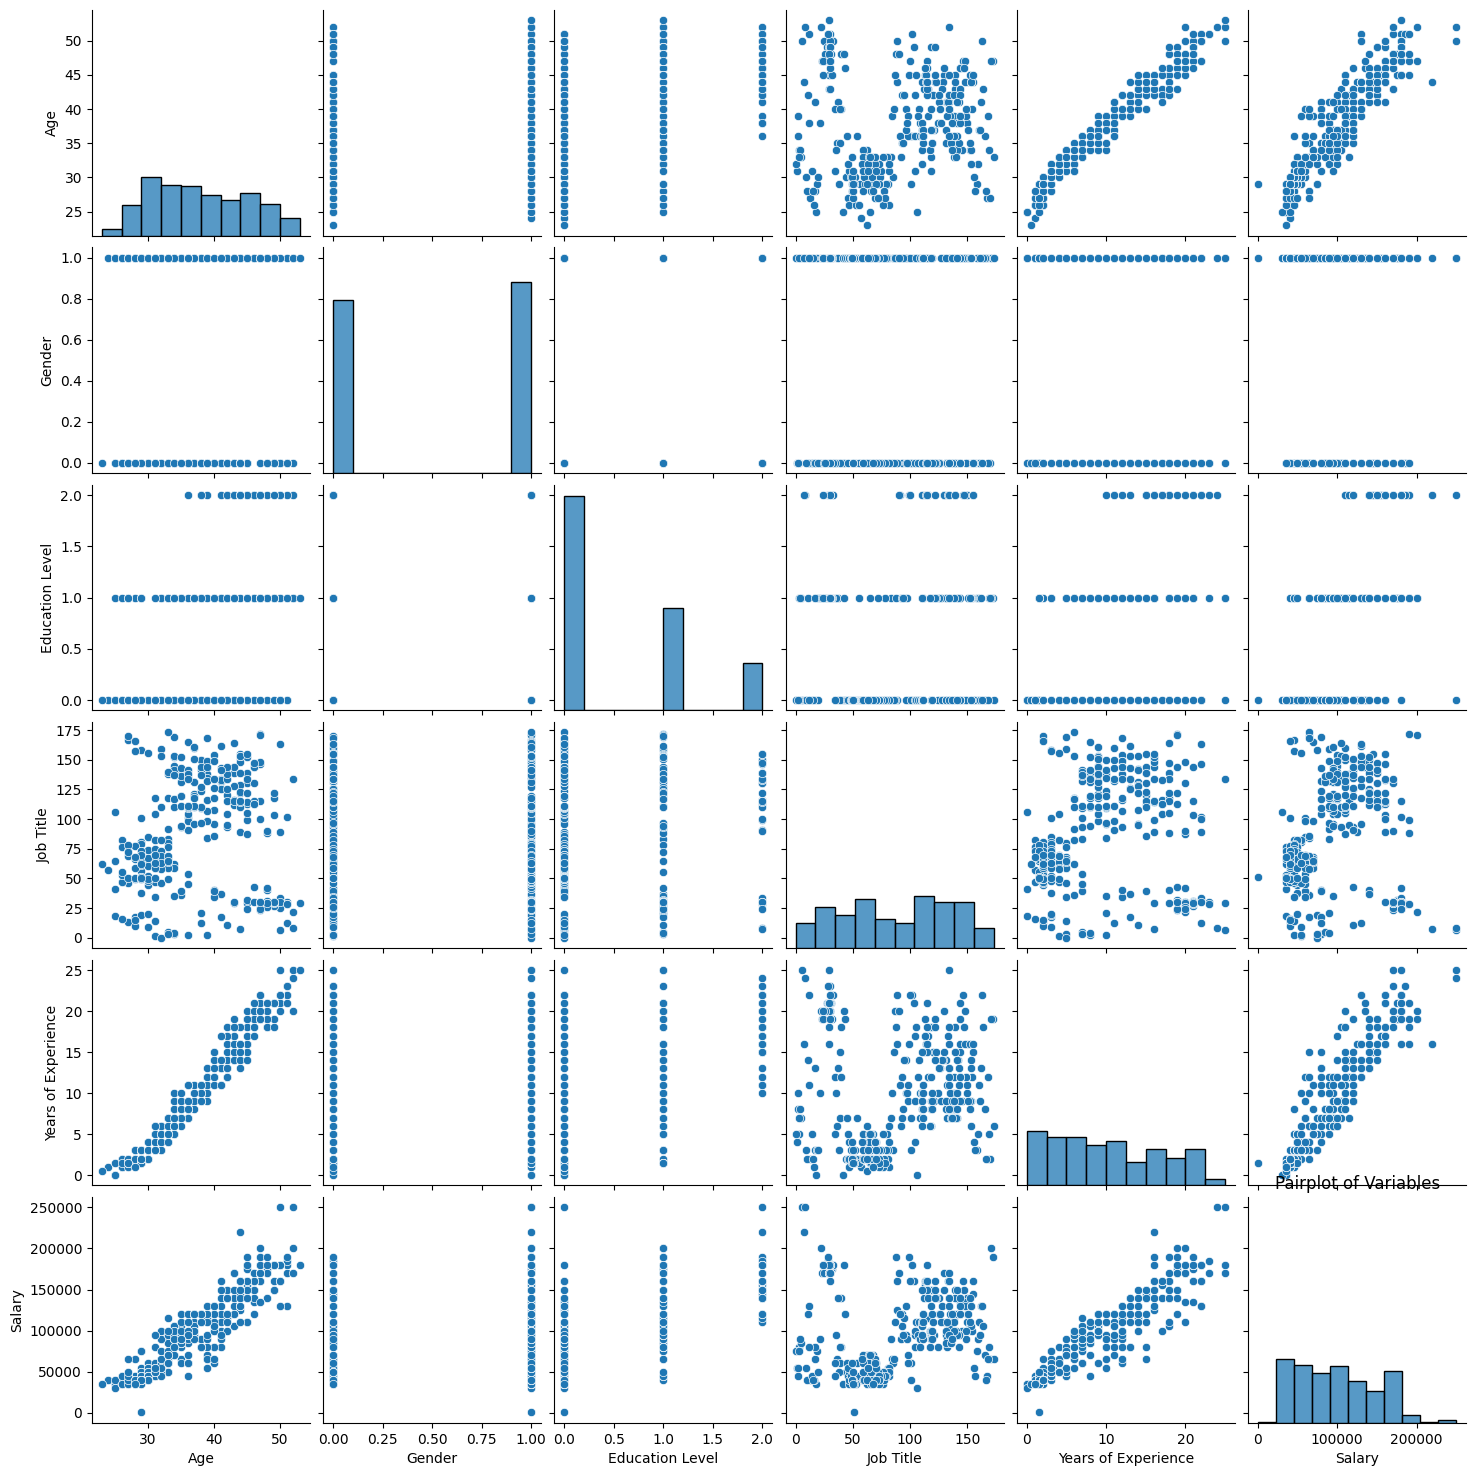

In [6]:
sns.pairplot(salary)
plt.title('Pairplot of Variables')
plt.show()


**Splitting the Data** \\
This cell splits the data into training and testing sets, which is crucial for training and subsequently evaluating the machine learning model.

In [7]:
X = salary.drop('Salary', axis=1)
y = salary['Salary']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.4, random_state=42)

print(f"Training data shape: {X_train.shape}")
print(f"Testing data shape: {X_test.shape}")


Training data shape: (194, 5)
Testing data shape: (130, 5)


**Model Building and Evaluation** \\
This cell builds a linear regression model, trains it with the training data, makes predictions on the test set, and evaluates the model using mean squared error and R-squared metrics, providing insights into the model's performance.

In [8]:
model = LinearRegression()
model.fit(X_train, y_train)

predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
r2 = r2_score(y_test, predictions)

# Printing  metrics
print(f"Mean Squared Error: {mse}")
print(f"R-squared Score: {r2}")


Mean Squared Error: 274795716.1915322
R-squared Score: 0.8773540779619049


**Visualization of Actual vs Predicted Results** \\
This cell visually compares the actual and predicted salary values, providing a clear visual representation of the model's prediction accuracy.

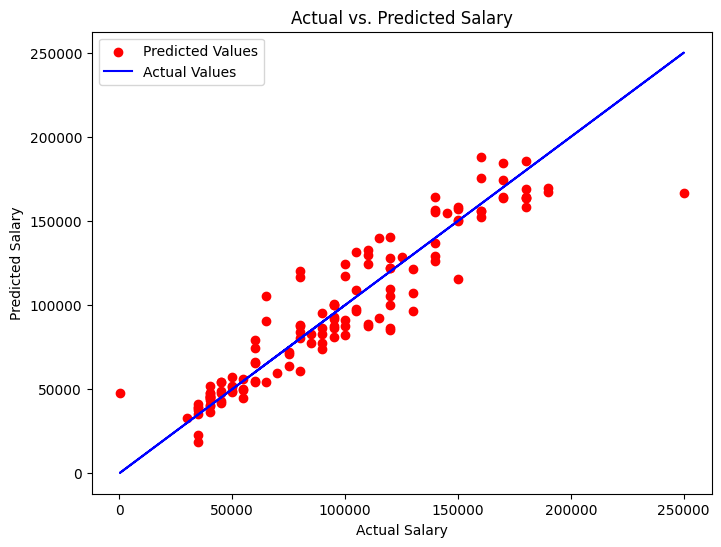

In [9]:
plt.figure(figsize=(8, 6))
plt.scatter(y_test, predictions, color='red', label='Predicted Values')
plt.plot(y_test, y_test, color='blue', label='Actual Values')
plt.xlabel("Actual Salary")
plt.ylabel("Predicted Salary")
plt.title("Actual vs. Predicted Salary")
plt.legend()
plt.show()


**Residual Plot** \\
A residual plot helps in checking the assumption of linearity and homoscedasticity (constant variance) in a regression model. It shows the residuals on the vertical axis and the independent variable on the horizontal axis.

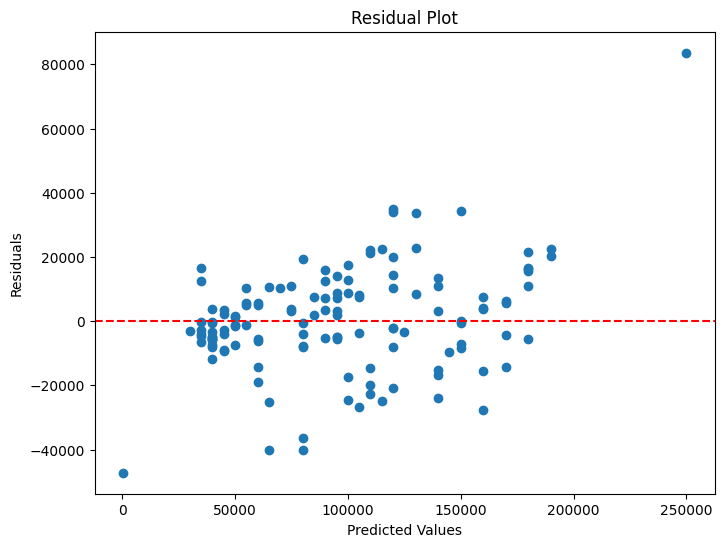

In [10]:
# Calculating residuals
residuals = y_test - predictions

plt.figure(figsize=(8, 6))
plt.scatter(y_test, residuals)
plt.axhline(y=0, color='r', linestyle='--')
plt.xlabel('Predicted Values')
plt.ylabel('Residuals')
plt.title('Residual Plot')
plt.show()

**Checking Normality of Residuals** \\
Checking the normality of residuals is crucial because many statistical techniques assume that the residuals are normally distributed. A Q-Q plot is for this purpose.

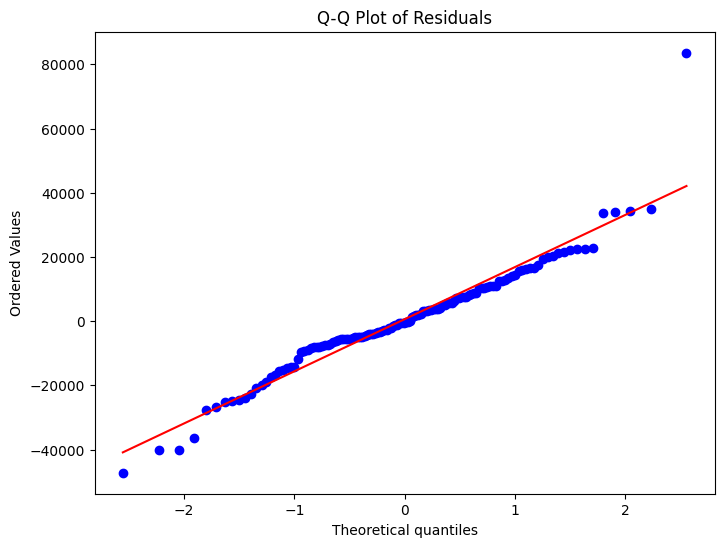

In [11]:
import scipy.stats as stats
# a Q-Q plot
plt.figure(figsize=(8, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot of Residuals')
plt.show()


**Experiment with Ridge Regression** \\
This cell introduces a Ridge regression model, which is particularly useful when dealing with multicollinearity (independent variables are highly correlated). It trains the model and evaluates its performance, providing an alternative perspective on model accuracy and robustness.

In [12]:
from sklearn.linear_model import Ridge

ridge_model = Ridge(alpha=1.0)
ridge_model.fit(X_train, y_train)

ridge_predictions = ridge_model.predict(X_test)

ridge_mse = mean_squared_error(y_test, ridge_predictions)
ridge_r2 = r2_score(y_test, ridge_predictions)

# Printing metrics for the Ridge model
print(f"Ridge Mean Squared Error: {ridge_mse}")
print(f"Ridge R-squared Score: {ridge_r2}")


Ridge Mean Squared Error: 273244603.3896502
Ridge R-squared Score: 0.8780463655361381


**Experiment with Lasso Regression** \\
This cell implements Lasso Regression, which not only helps in reducing overfitting but also in feature selection due to its ability to shrink coefficients to zero. The model is trained, predictions are made, and it is evaluated on the test data.

In [13]:
from sklearn.linear_model import Lasso

lasso_model = Lasso(alpha=0.1)
lasso_model.fit(X_train, y_train)

lasso_predictions = lasso_model.predict(X_test)

lasso_mse = mean_squared_error(y_test, lasso_predictions)
lasso_r2 = r2_score(y_test, lasso_predictions)

# Printing metrics for the Lasso model
print(f"Lasso Mean Squared Error: {lasso_mse}")
print(f"Lasso R-squared Score: {lasso_r2}")


Lasso Mean Squared Error: 274794567.8042002
Lasso R-squared Score: 0.8773545905063694


**Visual Comparison of Model Performances** \\
This cell plots a bar chart to compare the R-squared scores of the three regression models. This visual can help in quickly identifying which model performs the best in terms of explaining the variance of the target variable on the test set.

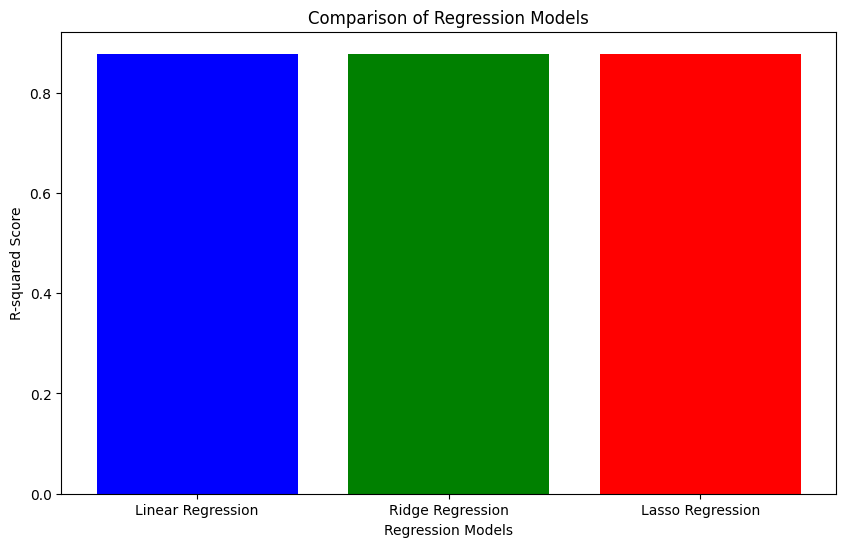

In [16]:
import matplotlib.pyplot as plt

models = ['Linear Regression', 'Ridge Regression', 'Lasso Regression']
r2_scores = [r2, ridge_r2, lasso_r2]

# Creating a bar chart
plt.figure(figsize=(10, 6))
plt.bar(models, r2_scores, color=['blue', 'green', 'red'])
plt.xlabel('Regression Models')
plt.ylabel('R-squared Score')
plt.title('Comparison of Regression Models')
plt.show()


**Define a Function for Making Predictions** \\
Let's create a function that takes input data, preprocesses it according to the model's requirements, and outputs predictions from each of the three models.

In [29]:
def make_predictions(age, gender, education_level, job_title, years_of_experience):
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Education Level': [education_level],
        'Job Title': [job_title],
        'Years of Experience': [years_of_experience]
    })

    input_data['Gender'] = label_encoders['Gender'].transform(input_data['Gender'])
    input_data['Education Level'] = label_encoders['Education Level'].transform(input_data['Education Level'])
    input_data['Job Title'] = label_encoders['Job Title'].transform(input_data['Job Title'])

    linear_pred = model.predict(input_data)
    ridge_pred = ridge_model.predict(input_data)
    lasso_pred = lasso_model.predict(input_data)

    print(f"Predictions for {age} years old {gender} with {education_level}, {job_title}, {years_of_experience} years experience:")
    print(f"Linear Regression Prediction: ${linear_pred[0]:,.2f}")
    print(f"Ridge Regression Prediction: ${ridge_pred[0]:,.2f}")
    print(f"Lasso Regression Prediction: ${lasso_pred[0]:,.2f}")

# Example 1: Young professional
make_predictions(25, 'Female', "Master's", 'Data Analyst', 2)

# Example 2: Mid-career professional
make_predictions(35, 'Male', "Bachelor's", 'Software Engineer', 10)

# Example 3: Senior professional
make_predictions(45, 'Male', "PhD", 'Senior Manager', 20)

# Example 4: Entry-level professional
make_predictions(22, 'Female', "Bachelor's", 'Junior Marketing Coordinator', 1)


Predictions for 25 years old Female with Master's, Data Analyst, 2 years experience:
Linear Regression Prediction: $45,170.39
Ridge Regression Prediction: $45,038.41
Lasso Regression Prediction: $45,170.07
Predictions for 35 years old Male with Bachelor's, Software Engineer, 10 years experience:
Linear Regression Prediction: $88,176.04
Ridge Regression Prediction: $88,309.15
Lasso Regression Prediction: $88,175.83
Predictions for 45 years old Male with PhD, Senior Manager, 20 years experience:
Linear Regression Prediction: $177,486.46
Ridge Regression Prediction: $177,240.65
Lasso Regression Prediction: $177,485.88
Predictions for 22 years old Female with Bachelor's, Junior Marketing Coordinator, 1 years experience:
Linear Regression Prediction: $16,733.91
Ridge Regression Prediction: $16,922.96
Lasso Regression Prediction: $16,733.67


**Plotting the Predictions** \\
This cell plots the predictions using a grouped bar chart to compare the results across different models for each profile

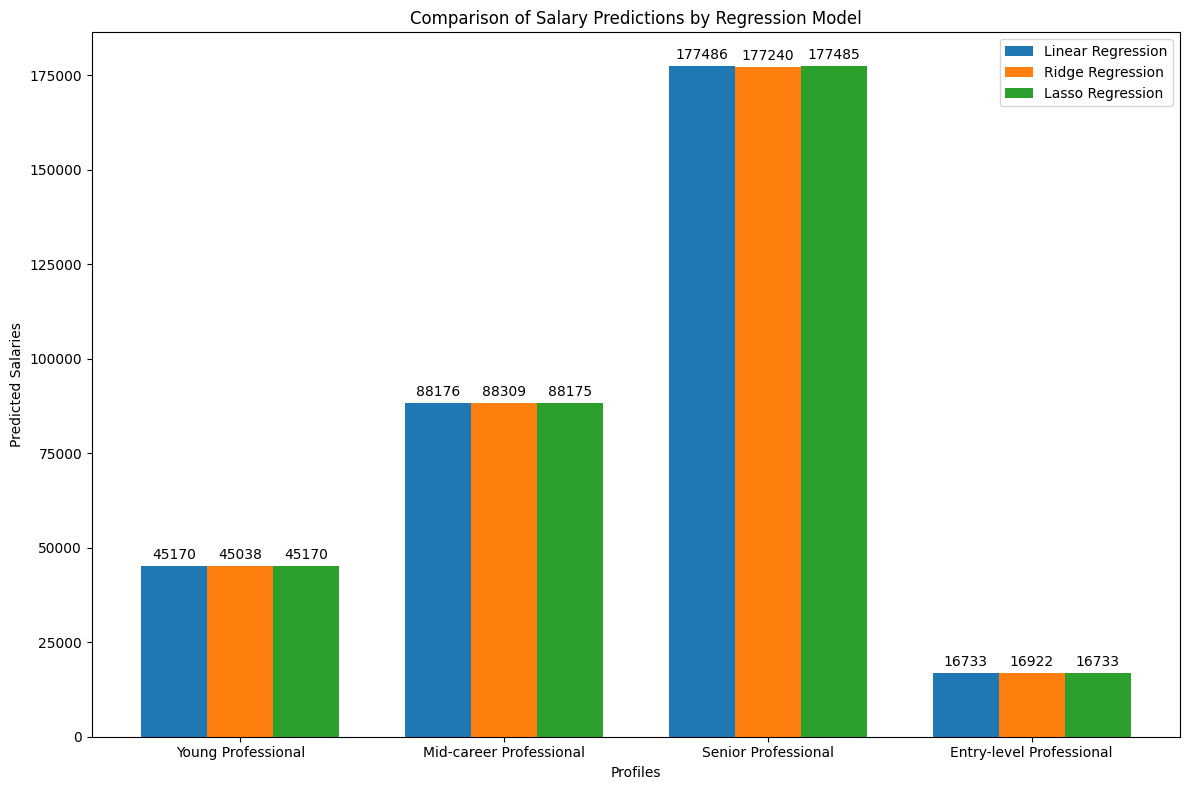

In [33]:
def collect_predictions(age, gender, education_level, job_title, years_of_experience):
    input_data = pd.DataFrame({
        'Age': [age],
        'Gender': [gender],
        'Education Level': [education_level],
        'Job Title': [job_title],
        'Years of Experience': [years_of_experience]
    })
    input_data['Gender'] = label_encoders['Gender'].transform(input_data['Gender'])
    input_data['Education Level'] = label_encoders['Education Level'].transform(input_data['Education Level'])
    input_data['Job Title'] = label_encoders['Job Title'].transform(input_data['Job Title'])
    linear_pred = model.predict(input_data)[0]
    ridge_pred = ridge_model.predict(input_data)[0]
    lasso_pred = lasso_model.predict(input_data)[0]

    return (linear_pred, ridge_pred, lasso_pred)

profiles = [
    (25, 'Female', "Master's", 'Data Analyst', 2),
    (35, 'Male', "Bachelor's", 'Software Engineer', 10),
    (45, 'Male', "PhD", 'Senior Manager', 20),
    (22, 'Female', "Bachelor's", 'Junior Marketing Coordinator', 1)
]

predictions = [collect_predictions(*profile) for profile in profiles]

# Plotting the Predictions
labels = ['Young Professional', 'Mid-career Professional', 'Senior Professional', 'Entry-level Professional']
linear_preds = [pred[0] for pred in predictions]
ridge_preds = [pred[1] for pred in predictions]
lasso_preds = [pred[2] for pred in predictions]

x = np.arange(len(labels))
width = 0.25

fig, ax = plt.subplots(figsize=(12, 8))
rects1 = ax.bar(x - width, linear_preds, width, label='Linear Regression')
rects2 = ax.bar(x, ridge_preds, width, label='Ridge Regression')
rects3 = ax.bar(x + width, lasso_preds, width, label='Lasso Regression')

ax.set_xlabel('Profiles')
ax.set_ylabel('Predicted Salaries')
ax.set_title('Comparison of Salary Predictions by Regression Model')
ax.set_xticks(x)
ax.set_xticklabels(labels)
ax.legend()

# Function to add labels on bars
def autolabel(rects):
    for rect in rects:
        height = rect.get_height()
        ax.annotate('{}'.format(int(height)),
                    xy=(rect.get_x() + rect.get_width() / 2, height),
                    xytext=(0, 3),
                    textcoords="offset points",
                    ha='center', va='bottom')

autolabel(rects1)
autolabel(rects2)
autolabel(rects3)

fig.tight_layout()

plt.show()
